## Linear Regression Models

### Using similarities between question and prompts to predict scores

In [ ]:
# Define the path to your prompt/answer JSON file
formatted_json_path = 'path_to_your_prompt_answer_pairs.json'  # Replace 'path_to_your_prompt_answer_pairs.json' with your file path

with open(json_file_path, 'r', encoding='utf-8') as file:
    formatted_data = json.load(file)

# Update the JSON data with grades under "scores"
for _, row in scores_df.iterrows():
    html_id = row['code'] + '.html'
    grade = row['grade']
    if html_id in formatted_data and 'scores' in formatted_data[html_id]:
        formatted_data[html_id]['scores']['grade'] = grade

with open(json_file_path, 'w', encoding='utf-8') as file:
    json.dump(formatted_data, file, indent=4)

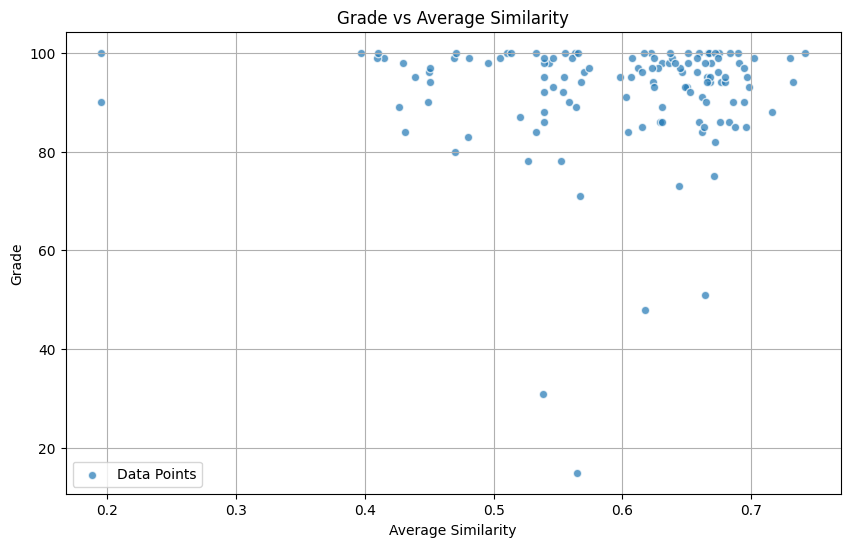

In [ ]:
# Define the path to your prompt/answer JSON file
formatted_json_path = 'path_to_your_prompt_answer_pairs.json'  # Replace 'path_to_your_prompt_answer_pairs.json' with your file path

with open(json_file_path, 'r', encoding='utf-8') as file:
    formatted_data = json.load(file)

# Extract average_similarity and grade
average_similarities = []
grades = []

for entry in formatted_data.values():
    if 'scores' in entry:
        scores = entry['scores']
        if 'average_similarity' in scores and 'grade' in scores:
            average_similarities.append(scores['average_similarity'])
            grades.append(scores['grade'])

# Plotting grade against average_similarity
plt.figure(figsize=(10, 6))
plt.scatter(average_similarities, grades, alpha=0.7, edgecolors='w', label='Data Points')

plt.xlabel('Average Similarity')
plt.ylabel('Grade')
plt.title('Grade vs Average Similarity')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Define the path to your prompt/answer JSON file
formatted_json_path = 'path_to_your_prompt_answer_pairs.json'  # Replace 'path_to_your_prompt_answer_pairs.json' with your file path

with open(json_file_path, 'r', encoding='utf-8') as file:
    formatted_data = json.load(file)

# Extract average_similarity and grade
average_similarities = []
grades = []

for entry in formatted_data.values():
    if 'scores' in entry:
        scores = entry['scores']
        if 'average_similarity' in scores and 'grade' in scores:
            average_similarities.append(scores['average_similarity'])
            grades.append(scores['grade'])

X = np.array(average_similarities).reshape(-1, 1)  # Feature
y = np.array(grades)  # Target

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

# Clip predictions to ensure they are within the range 0-100
y_pred_clipped = np.clip(y_pred, 0, 100)

# Calculate and print the performance metrics
mse = mean_squared_error(y_val, y_pred_clipped)
r2 = r2_score(y_val, y_pred_clipped)
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 41.986395757625786
R-squared Score: -0.39927053501060117


### Using number of the words in prompts to predict scores

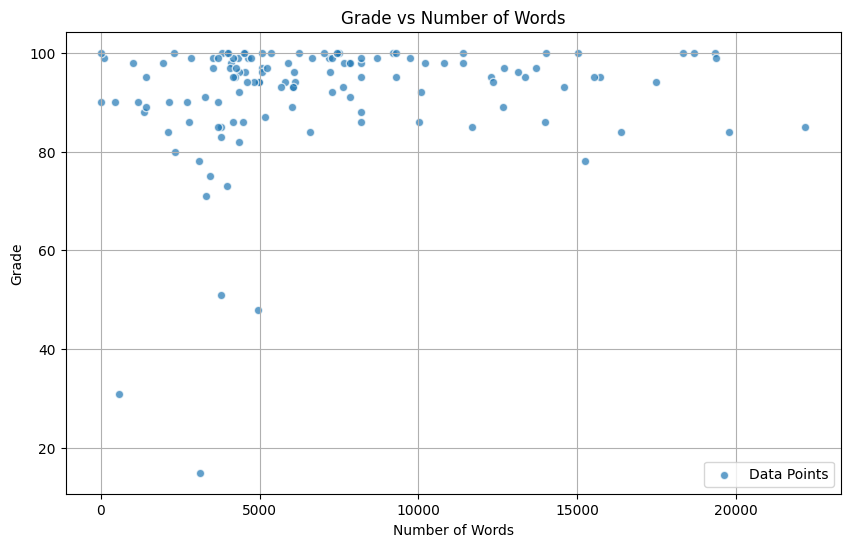

In [ ]:
# Define the path to your prompt/answer JSON file
formatted_json_path = 'path_to_your_prompt_answer_pairs.json'  # Replace 'path_to_your_prompt_answer_pairs.json' with your file path

with open(json_file_path, 'r', encoding='utf-8') as file:
    formatted_data = json.load(file)

# Extract number_of_words and grade
word_counts = []
grades = []

for entry in formatted_data.values():
    if 'scores' in entry and 'grade' in entry['scores'] and 'number_of_words' in entry:
        word_counts.append(entry['number_of_words'])
        grades.append(entry['scores']['grade'])

# Plotting number_of_words against grade
plt.figure(figsize=(10, 6))
plt.scatter(word_counts, grades, alpha=0.7, edgecolors='w', label='Data Points')

plt.xlabel('Number of Words')
plt.ylabel('Grade')
plt.title('Grade vs Number of Words in Prompts')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Define the path to your prompt/answer JSON file
formatted_json_path = 'path_to_your_prompt_answer_pairs.json'  # Replace 'path_to_your_prompt_answer_pairs.json' with your file path

with open(json_file_path, 'r', encoding='utf-8') as file:
    formatted_data = json.load(file)

# Extract number_of_words and grade
word_counts = []
grades = []

for entry in formatted_data.values():
    if 'scores' in entry and 'grade' in entry['scores'] and 'number_of_words' in entry:
        word_counts.append(entry['number_of_words'])
        grades.append(entry['scores']['grade'])

# Convert lists to numpy arrays
X = np.array(word_counts).reshape(-1, 1)
y = np.array(grades)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

# Clip predictions to ensure they are within the range 0-100
y_pred_clipped = np.clip(y_pred, 0, 100)

# Calculate and print the performance metrics
mse = mean_squared_error(y_val, y_pred_clipped)
r2 = r2_score(y_val, y_pred_clipped)
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 56.67080214367846
R-squared Score: -0.8886542224968763


### Using number of prompts for each user to predict scores

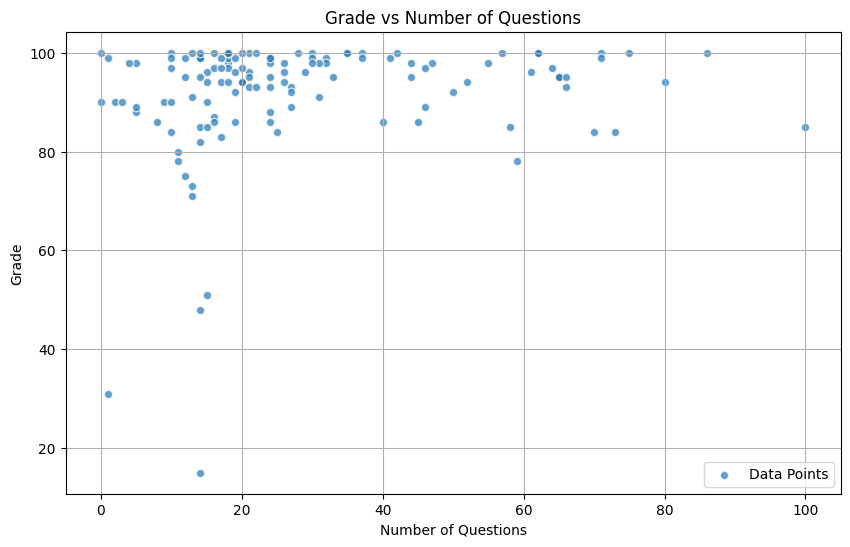

In [ ]:
# Define the path to your prompt/answer JSON file
formatted_json_path = 'path_to_your_prompt_answer_pairs.json'  # Replace 'path_to_your_prompt_answer_pairs.json' with your file path

with open(json_file_path, 'r', encoding='utf-8') as file:
    formatted_data = json.load(file)

# Extract number_of_questions and grade
number_of_questions = []
grades = []

for entry in formatted_data.values():
    if 'scores' in entry and 'grade' in entry['scores'] and 'pairs' in entry:
        num_questions = len(entry['pairs'])
        number_of_questions.append(num_questions)
        grades.append(entry['scores']['grade'])

# Plotting number_of_questions against grade
plt.figure(figsize=(10, 6))
plt.scatter(number_of_questions, grades, alpha=0.7, edgecolors='w', label='Data Points')

plt.xlabel('Number of Questions')
plt.ylabel('Grade')
plt.title('Grade vs Number of Questions')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Define the path to your prompt/answer JSON file
formatted_json_path = 'path_to_your_prompt_answer_pairs.json'  # Replace 'path_to_your_prompt_answer_pairs.json' with your file path

with open(json_file_path, 'r', encoding='utf-8') as file:
    formatted_data = json.load(file)

# Extract number_of_questions and grade
number_of_questions = []
grades = []

for entry in formatted_data.values():
    if 'scores' in entry and 'grade' in entry['scores'] and 'pairs' in entry:
        num_questions = len(entry['pairs'])
        number_of_questions.append(num_questions)
        grades.append(entry['scores']['grade'])

# Convert lists to numpy arrays
X = np.array(number_of_questions).reshape(-1, 1)
y = np.array(grades)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

# Clip predictions to ensure they are within the range 0-100
y_pred_clipped = np.clip(y_pred, 0, 100)

# Calculate and print the performance metrics
mse = mean_squared_error(y_val, y_pred_clipped)
r2 = r2_score(y_val, y_pred_clipped)
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 55.59799304446039
R-squared Score: -0.8529009711129572


### Using average sentiment of the prompts to predict scores

In [ ]:
# Define the path to your prompt/answer JSON file
formatted_json_path = 'path_to_your_prompt_answer_pairs.json'  # Replace 'path_to_your_prompt_answer_pairs.json' with your file path

with open(json_file_path, 'r', encoding='utf-8') as file:
    data = json.load(file)

# Function to calculate average sentiment of a list of texts
def average_sentiment(texts):
    total_sentiment = sum(TextBlob(text).sentiment.polarity for text in texts)
    return total_sentiment / len(texts) if texts else 0

# Calculate average sentiment for each HTML ID
for entry in data.values():
    questions = [pair[0] for pair in entry['pairs']]  # Extract questions
    avg_sentiment = average_sentiment(questions)
    if 'scores' in entry:
        entry['scores']['avg_sentiment'] = avg_sentiment

with open(json_file_path, 'w', encoding='utf-8') as file:
    json.dump(data, file, indent=4)

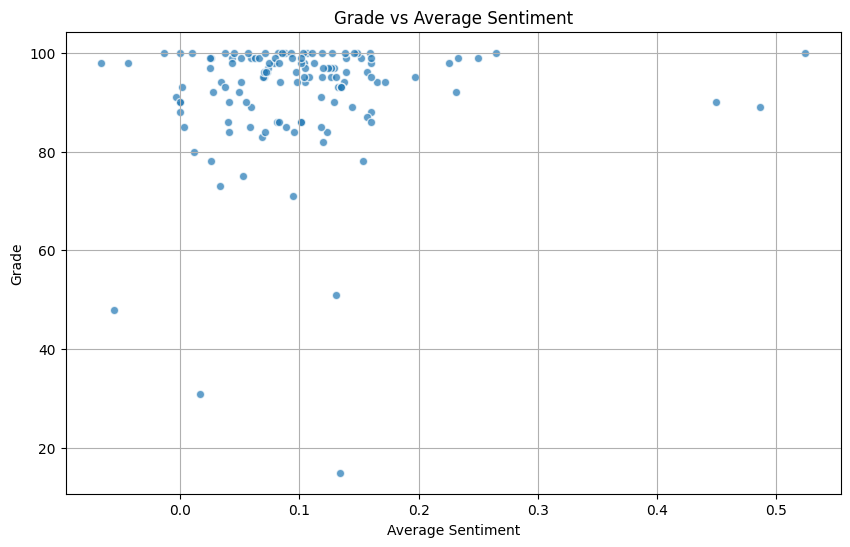

Correlation coefficient: 0.10751562842802402


In [ ]:
grades = []
avg_sentiments = []

for entry in data.values():
    if 'scores' in entry:
        scores = entry['scores']
        if 'grade' in scores and 'avg_sentiment' in scores:
            grades.append(scores['grade'])
            avg_sentiments.append(scores['avg_sentiment'])

plt.figure(figsize=(10, 6))
plt.scatter(avg_sentiments, grades, alpha=0.7, edgecolors='w')
plt.xlabel('Average Sentiment')
plt.ylabel('Grade')
plt.title('Grade vs Average Sentiment')
plt.grid(True)
plt.show()

correlation, _ = pearsonr(avg_sentiments, grades)
print("Correlation coefficient:", correlation)

In [ ]:
# Define the path to your prompt/answer JSON file
formatted_json_path = 'path_to_your_prompt_answer_pairs.json'  # Replace 'path_to_your_prompt_answer_pairs.json' with your file path

with open(json_file_path, 'r', encoding='utf-8') as file:
    formatted_data = json.load(file)

# Extract average sentiment and grade
avg_sentiments = []
grades = []

for entry in formatted_data.values():
    if 'scores' in entry and 'grade' in entry['scores'] and 'avg_sentiment' in entry['scores']:
        avg_sentiments.append(entry['scores']['avg_sentiment'])
        grades.append(entry['scores']['grade'])

X = np.array(avg_sentiments).reshape(-1, 1)  # Feature
y = np.array(grades)  # Target

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

# Clip predictions to ensure they are within the range 0-100
y_pred_clipped = np.clip(y_pred, 0, 100)

# Calculate and print the performance metrics
mse = mean_squared_error(y_val, y_pred_clipped)
r2 = r2_score(y_val, y_pred_clipped)
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 40.73659556302244
R-squared Score: -0.3576187438672438


### Using average length of prompts to predict scores

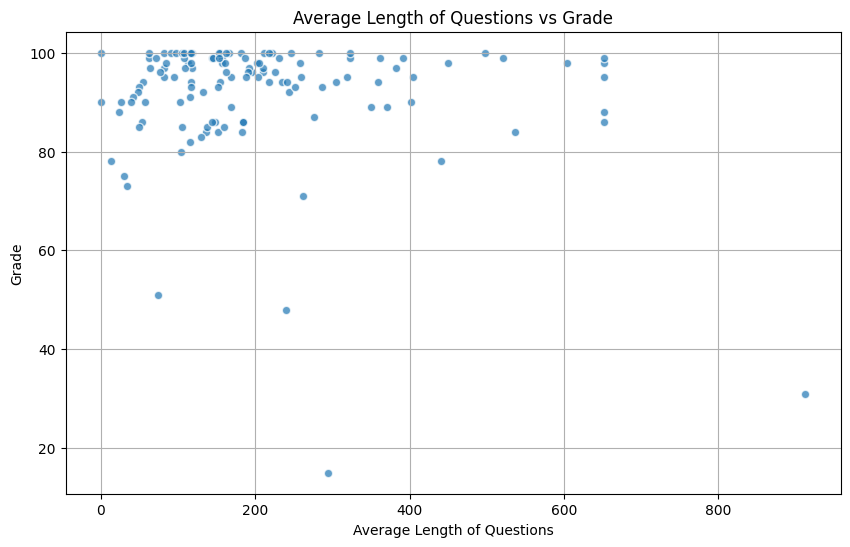

Mean Squared Error: 41.57439906495908
R-squared Score: -0.3855400201100543


In [ ]:
# Define the path to your prompt/answer JSON file
formatted_json_path = 'path_to_your_prompt_answer_pairs.json'  # Replace 'path_to_your_prompt_answer_pairs.json' with your file path

with open(json_file_path, 'r', encoding='utf-8') as file:
    formatted_data = json.load(file)

# Extract avg length of questions and grade
avg_length_of_questions = []
grades = []

for entry in formatted_data.values():
    if 'scores' in entry and 'grade' in entry['scores'] and 'pairs' in entry:
        total_length = sum(len(pair[0]) for pair in entry['pairs'])
        avg_length = total_length / len(entry['pairs']) if entry['pairs'] else 0
        avg_length_of_questions.append(avg_length)
        grades.append(entry['scores']['grade'])

X = np.array(avg_length_of_questions).reshape(-1, 1)
y = np.array(grades)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

# Clip predictions to ensure they are within the range 0-100
y_pred_clipped = np.clip(y_pred, 0, 100)

mse = mean_squared_error(y_val, y_pred_clipped)
r2 = r2_score(y_val, y_pred_clipped)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.7, edgecolors='w')
plt.xlabel('Average Length of Questions')
plt.ylabel('Grade')
plt.title('Average Length of Questions vs Grade')
plt.grid(True)
plt.show()

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

### Using average length of GPT response to predict scores

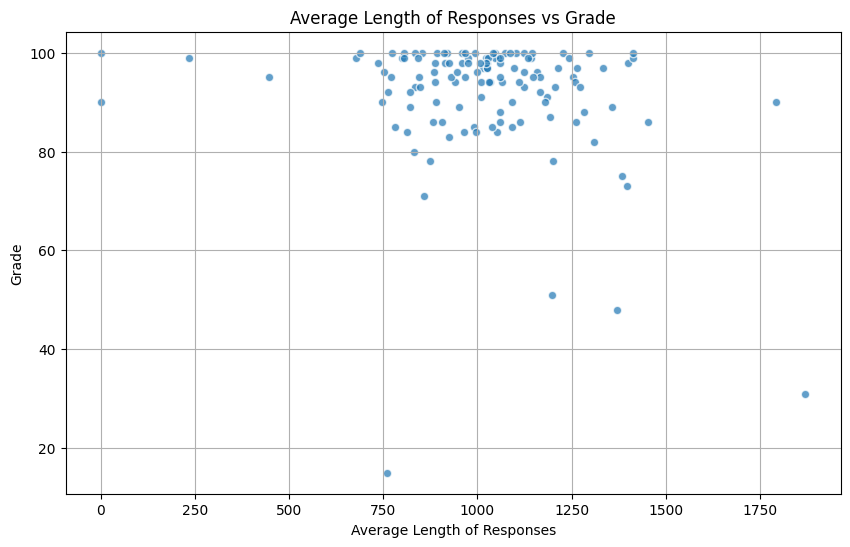

Mean Squared Error: 38.42842964626688
R-squared Score: -0.2806950523011442


In [ ]:
# Define the path to your prompt/answer JSON file
formatted_json_path = 'path_to_your_prompt_answer_pairs.json'  # Replace 'path_to_your_prompt_answer_pairs.json' with your file path

with open(json_file_path, 'r', encoding='utf-8') as file:
    formatted_data = json.load(file)

# Extract avg length of questions and grade
avg_length_of_responses = []
grades = []

for entry in formatted_data.values():
    if 'scores' in entry and 'grade' in entry['scores'] and 'pairs' in entry:
        total_length = sum(len(pair[1]) for pair in entry['pairs'])
        avg_length = total_length / len(entry['pairs']) if entry['pairs'] else 0
        avg_length_of_responses.append(avg_length)
        grades.append(entry['scores']['grade'])

X = np.array(avg_length_of_responses).reshape(-1, 1)
y = np.array(grades)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

# Clip predictions to ensure they are within the range 0-100
y_pred_clipped = np.clip(y_pred, 0, 100)

mse = mean_squared_error(y_val, y_pred_clipped)
r2 = r2_score(y_val, y_pred_clipped)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.7, edgecolors='w')
plt.xlabel('Average Length of Responses')
plt.ylabel('Grade')
plt.title('Average Length of Responses vs Grade')
plt.grid(True)
plt.show()

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import all neccessary libraries
import os
import re
import json
import nltk
import torch
import numpy as np
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from collections import Counter
from transformers import AutoTokenizer, AutoModel
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics.pairwise import cosine_similarity
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from scipy.stats import pearsonr
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## Use number of Errors in Prompts to Predict Scores

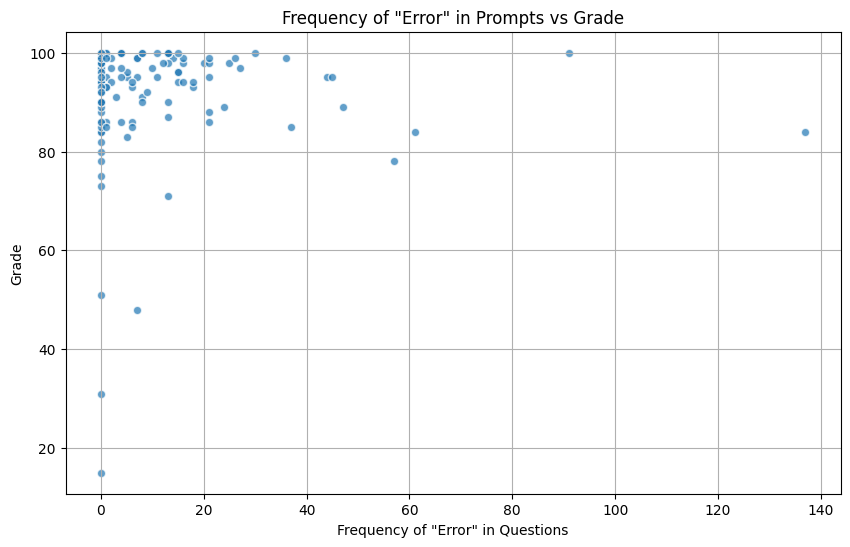

Mean Squared Error: 43.16375353460681
R-squared Score: -0.43850805508746826


In [3]:
# Define the path to your prompt/answer JSON file
formatted_json_path = 'path_to_your_prompt_answer_pairs.json'  # Replace 'path_to_your_prompt_answer_pairs.json' with your file path

with open(json_file_path, 'r', encoding='utf-8') as file:
    formatted_data = json.load(file)

# Function to count occurrences of the word "error"
def count_error(text):
    return text.lower().count('error')

# Extract error count and grade
error_counts = []
grades = []

for entry in formatted_data.values():
    if 'scores' in entry and 'grade' in entry['scores'] and 'pairs' in entry:
        total_errors = sum(count_error(pair[0]) for pair in entry['pairs'])
        error_counts.append(total_errors)
        grades.append(entry['scores']['grade'])

X = np.array(error_counts).reshape(-1, 1)
y = np.array(grades)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

# Clip predictions to ensure they are within the range 0-100
y_pred_clipped = np.clip(y_pred, 0, 100)

mse = mean_squared_error(y_val, y_pred_clipped)
r2 = r2_score(y_val, y_pred_clipped)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.7, edgecolors='w')
plt.xlabel('Frequency of "Error" in Questions')
plt.ylabel('Grade')
plt.title('Frequency of "Error" in Prompts vs Grade')
plt.grid(True)
plt.show()

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

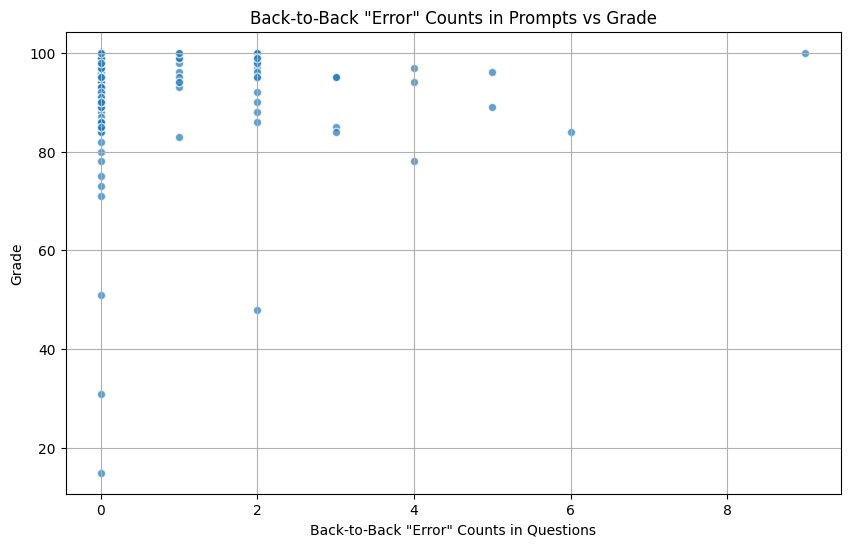

Mean Squared Error: 45.07670906164542
R-squared Score: -0.5022606648428469


In [4]:
# Define the path to your prompt/answer JSON file
formatted_json_path = 'path_to_your_prompt_answer_pairs.json'  # Replace 'path_to_your_prompt_answer_pairs.json' with your file path

json_file_path = '/content/drive/MyDrive/cs412 project dataset/formatted_prompt_answer_pairs.json'
with open(json_file_path, 'r', encoding='utf-8') as file:
    formatted_data = json.load(file)

# Function to check if 'error' is in text
def contains_error(text):
    return 'error' in text.lower()

# Extract back-to-back 'error' counts and grade
back_to_back_error_counts = []
grades = []

for entry in formatted_data.values():
    if 'scores' in entry and 'grade' in entry['scores'] and 'pairs' in entry:
        error_count = 0
        for i in range(len(entry['pairs']) - 1):
            if contains_error(entry['pairs'][i][0]) and contains_error(entry['pairs'][i + 1][0]):
                error_count += 1
        back_to_back_error_counts.append(error_count)
        grades.append(entry['scores']['grade'])

X = np.array(back_to_back_error_counts).reshape(-1, 1)
y = np.array(grades)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

# Clip predictions to ensure they are within the range 0-100
y_pred_clipped = np.clip(y_pred, 0, 100)

mse = mean_squared_error(y_val, y_pred_clipped)
r2 = r2_score(y_val, y_pred_clipped)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.7, edgecolors='w')
plt.xlabel('Back-to-Back "Error" Counts in Questions')
plt.ylabel('Grade')
plt.title('Back-to-Back "Error" Counts in Prompts vs Grade')
plt.grid(True)
plt.show()

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")